In [4]:
####DATA PREPARATION####
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split,KFold, cross_val_score,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from statistics import mean
from subprocess import call
from IPython.display import Image

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time

#Load data_frame
col_names = ['Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info','src_port','dst_port']
#data_frame = pd.read_csv("Samples/smallTraffic-_backup.csv",encoding = "ISO-8859-1", header=0, names=col_names)
data_frame = pd.read_csv("Samples/smallTraffic-_backup.csv",encoding = "ISO-8859-1", header=0, names=col_names)

data_frame

,Time,Source,Destination,Protocol,Length,Info,src_port,dst_port
1,0.000000,192.168.3.131,72.14.213.138,HTTP,997,GET /complete/search?client=chrome&hl=en-US&q=...,57011.0,80.0
2,0.029841,72.14.213.138,192.168.3.131,HTTP,440,HTTP/1.1 200 OK (text/javascript),80.0,57011.0
3,0.223883,192.168.3.131,72.14.213.102,TCP,66,55950 > 80 [SYN] Seq=0 Win=8192 Len=0 MSS=14...,55950.0,80.0
4,0.229423,192.168.3.131,72.14.213.138,TCP,54,57011 > 80 [ACK] Seq=944 Ack=387 Win=16192 L...,57011.0,80.0
5,0.242649,72.14.213.102,192.168.3.131,TCP,66,"80 > 55950 [SYN, ACK] Seq=0 Ack=1 Win=5720 L...",80.0,55950.0
...,...,...,...,...,...,...,...,...
14257,298.284563,10.0.2.15,65.54.167.27,TCP,54,"2548 > 5480 [RST, ACK] Seq=1902 Ack=42479 Wi...",2548.0,5480.0
14258,298.303019,192.168.3.131,255.255.255.255,DB-LSP-DISC,162,Dropbox LAN sync Discovery Protocol,17500.0,17500.0
14259,298.305344,192.168.3.131,192.168.3.255,DB-LSP-DISC,162,Dropbox LAN sync Discovery Protocol,17500.0,17500.0
14260,298.503019,192.168.3.131,255.255.255.255,DB-LSP-DISC,162,Dropbox LAN sync Discovery Protocol,17500.0,17500.0


In [5]:
data_frame['Protocol'].unique()

array(['HTTP', 'TCP', 'TLSv1', 'HTTP/XML', 'SSDP', 'DHCP', 'LLMNR', 'ARP',
       'UDP', 'NBNS', 'SSLv2', 'NAT-PMP', 'SMB', 'NBSS', 'DNS', 'MSNMS',
       'SSLv3', 'ICMP', 'RTCP', 'BROWSER', 'SNMP', 'DB-LSP-DISC'],
      dtype=object)

In [6]:
data_frame.describe()

,Time,Length,src_port,dst_port
count,14261.000000,14261.000000,14231.000000,14231.000000
mean,142.233326,646.275226,19948.689340,27239.426112
std,81.431385,662.109126,25650.721107,26830.230776
min,0.000000,42.000000,53.000000,53.000000
25%,67.264919,54.000000,80.000000,443.000000
50%,132.903516,161.000000,1863.000000,10641.000000
75%,198.705664,1514.000000,56048.000000,56331.000000
max,298.505344,1514.000000,64982.000000,64982.000000


In [7]:
data_frame.dtypes

Time           float64
Source          object
Destination     object
Protocol        object
Length           int64
Info            object
src_port       float64
dst_port       float64
dtype: object

In [8]:
#Save .csv file with final data frame
#data_frame.to_csv(r'C:\Users\user\testML_PRJ\test1.csv')

In [9]:
data_frame.head(10)

,Time,Source,Destination,Protocol,Length,Info,src_port,dst_port
1,0.000000,192.168.3.131,72.14.213.138,HTTP,997,GET /complete/search?client=chrome&hl=en-US&q=...,57011.0,80.0
2,0.029841,72.14.213.138,192.168.3.131,HTTP,440,HTTP/1.1 200 OK (text/javascript),80.0,57011.0
3,0.223883,192.168.3.131,72.14.213.102,TCP,66,55950 > 80 [SYN] Seq=0 Win=8192 Len=0 MSS=14...,55950.0,80.0
4,0.229423,192.168.3.131,72.14.213.138,TCP,54,57011 > 80 [ACK] Seq=944 Ack=387 Win=16192 L...,57011.0,80.0
5,0.242649,72.14.213.102,192.168.3.131,TCP,66,"80 > 55950 [SYN, ACK] Seq=0 Ack=1 Win=5720 L...",80.0,55950.0
6,0.242696,192.168.3.131,72.14.213.102,TCP,54,55950 > 80 [ACK] Seq=1 Ack=1 Win=65780 Len=0,55950.0,80.0
7,0.243050,192.168.3.131,72.14.213.102,HTTP,998,GET /complete/search?client=chrome&hl=en-US&q=...,55950.0,80.0
8,0.262981,192.168.3.131,72.14.213.102,TCP,54,"55950 > 80 [FIN, ACK] Seq=945 Ack=1 Win=6578...",55950.0,80.0
9,0.264074,72.14.213.102,192.168.3.131,TCP,60,80 > 55950 [ACK] Seq=1 Ack=945 Win=7616 Len=0,80.0,55950.0
10,0.276671,72.14.213.102,192.168.3.131,HTTP,541,HTTP/1.1 200 OK (text/javascript),80.0,55950.0


In [10]:
#Wyzerowanie portow dla protokolu ICMP (wystepuje NaN)
icmp = ['ICMP']
temp_df = data_frame['Protocol'].copy(deep=True)
data_frame.src_port[temp_df.isin(icmp)] = 0
data_frame.dst_port[temp_df.isin(icmp)] = 0
data_frame.tail(1)

<ipython-input-10-9a9e2a197cf3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame.src_port[temp_df.isin(icmp)] = 0
<ipython-input-10-9a9e2a197cf3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame.dst_port[temp_df.isin(icmp)] = 0


,Time,Source,Destination,Protocol,Length,Info,src_port,dst_port
14261,298.505344,192.168.3.131,192.168.3.255,DB-LSP-DISC,162,Dropbox LAN sync Discovery Protocol,17500.0,17500.0


In [11]:
####LEARNING AND ALGORITHM PART####
#In our case we'll be using Naive Bayes algorithm for classification
#Creating Label Encoder
label_enc = preprocessing.LabelEncoder()

#Convert ports, and len column into numbers
src_encoded=label_enc.fit_transform(data_frame['Source'])
dst_encoded=label_enc.fit_transform(data_frame['Destination'])
src_port_encoded=label_enc.fit_transform(data_frame['src_port'])
dst_port_encoded=label_enc.fit_transform(data_frame['dst_port'])

len_encoded = label_enc.fit_transform(data_frame['Length'])

#Convert PROTOCOL column into SIMPLER numbers
protocol_encoded=label_enc.fit_transform(data_frame['Protocol'])

features=list(zip(src_encoded,dst_encoded,src_port_encoded,dst_port_encoded,len_encoded))


In [12]:
features

[(51, 181, 415, 4, 631),
 (169, 57, 4, 395, 275),
 (51, 176, 237, 4, 11),
 (51, 181, 415, 4, 1),
 (164, 57, 4, 217, 11),
 (51, 176, 237, 4, 1),
 (51, 176, 237, 4, 632),
 (51, 176, 237, 4, 1),
 (164, 57, 4, 217, 5),
 (164, 57, 4, 217, 337),
 (51, 176, 237, 4, 1),
 (164, 57, 4, 217, 5),
 (51, 182, 202, 9, 11),
 (170, 57, 9, 185, 11),
 (51, 182, 202, 9, 1),
 (51, 182, 202, 9, 146),
 (170, 57, 9, 185, 5),
 (170, 57, 9, 185, 841),
 (170, 57, 9, 185, 224),
 (51, 182, 202, 9, 1),
 (51, 182, 202, 9, 213),
 (170, 57, 9, 185, 182),
 (170, 57, 9, 185, 41),
 (170, 57, 9, 185, 5),
 (51, 182, 202, 9, 1),
 (51, 141, 238, 4, 11),
 (170, 57, 9, 185, 275),
 (170, 57, 9, 185, 841),
 (170, 57, 9, 185, 42),
 (51, 182, 202, 9, 1),
 (170, 57, 9, 185, 841),
 (170, 57, 9, 185, 684),
 (51, 182, 202, 9, 1),
 (170, 57, 9, 185, 841),
 (170, 57, 9, 185, 42),
 (51, 182, 202, 9, 1),
 (170, 57, 9, 185, 841),
 (170, 57, 9, 185, 443),
 (51, 182, 202, 9, 1),
 (170, 57, 9, 185, 841),
 (170, 57, 9, 185, 841),
 (170, 57, 9,

In [13]:
#--------------------------------------Normal training-------------------------------------------------------
'''
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#Split data_frame into training set & test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(features, port_encoded, test_size=0.3)

#######################################
#Import Gaussian Naive Bayes model

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
'''
#-------------------------------------Normal training-------------------------------------------------------

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn import metrics\n\n#Split data_frame into training set & test set\n# 70% training and 30% test\nX_train, X_test, y_train, y_test = train_test_split(features, port_encoded, test_size=0.3)\n\n#######################################\n#Import Gaussian Naive Bayes model\n\n#Create a Gaussian Classifier\ngnb = GaussianNB()\n\n#Train the model using the training sets\ngnb.fit(X_train, y_train)\n\n#Predict the response for test dataset\ny_pred = gnb.predict(X_test)\n\n# Model Accuracy, how often is the classifier correct?\nprint("Accuracy:",metrics.accuracy_score(y_test, y_pred))\n'

In [14]:
#--------------------------------------NAIVE BAYES Cross validation-------------------------------------------------------
start_time = time.time()

X = features
y = protocol_encoded
k_fold = KFold(n_splits=10)

#PCA (Principal Component Analysis)

gaussClf = GaussianNB()
gaussClf.fit(X, y)

#n_jobs = 1 -> Ilosc procesorów do obliczania(równoległe)
our_cross_valid_score = cross_val_score(gaussClf, X, y, cv=k_fold, n_jobs=1,scoring='accuracy')
y_predict = cross_val_predict(gaussClf, X, y, cv=k_fold, n_jobs=1)

print("NAIVE BAYES CLASSIFIER")
print(our_cross_valid_score)
print("\nmean : ",mean(our_cross_valid_score))
print("accuracy:",metrics.accuracy_score(y, y_predict))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y, y_predict))
print("standard deviation:",np.std(our_cross_valid_score))
print("precision:",metrics.precision_score(y,y_predict,average='weighted',zero_division=1))
print("f-measure:",metrics.f1_score(y,y_predict,average='weighted',zero_division=1))
print("mean_absolute_error:",metrics.mean_absolute_error(y,y_predict))

print("\n\nTime: %s seconds" % (time.time() - start_time))

NAIVE BAYES CLASSIFIER
[0.6923616  0.87377279 0.83099579 0.63744741 0.62552595 0.76367461
 0.83730715 0.84221599 0.79242637 0.63604488]

mean :  0.7531772537448977
accuracy: 0.7531729892714396
balanced_accuracy: 0.4862839659738398
standard deviation: 0.09184891025833479
precision: 0.6883585113304798
f-measure: 0.668959762141944
mean_absolute_error: 1.502068578641049


Time: 1.2864305973052979 seconds


In [15]:
'''
WNIOSEK
Naive Bayes Classifier - 50/60%
Decission Tree Classifier > 90%

Dla naszego przypadku algorytm naive bayes sprawdza się bardzo słabo.
Sama zmiana klasyfikator na drzewo decyzyjne ZNACZNIE poprawia wynik.
'''

'\nWNIOSEK\nNaive Bayes Classifier - 50/60%\nDecission Tree Classifier > 90%\n\nDla naszego przypadku algorytm naive bayes sprawdza się bardzo słabo.\nSama zmiana klasyfikator na drzewo decyzyjne ZNACZNIE poprawia wynik.\n'

In [16]:
#--------------------------------------Random forest Classifier-------------------------------------------------------------
start_time = time.time()

X = features
y = protocol_encoded
k_fold = KFold(n_splits=10)

randomForestClf = RandomForestClassifier()
randomForestClf.fit(X , y)

our_cross_valid_score = cross_val_score(randomForestClf, X, y, cv=k_fold, n_jobs=1,scoring='accuracy')
y_predict = cross_val_predict(randomForestClf, X, y, cv=k_fold, n_jobs=1)

print("RANDOM FOREST CLASSIFIER")
print(our_cross_valid_score)
print("\nmean : ",mean(our_cross_valid_score))
print("accuracy:",metrics.accuracy_score(y, y_predict))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y, y_predict))
print("standard deviation:",np.std(our_cross_valid_score))
print("precision:",metrics.precision_score(y,y_predict,average='weighted',zero_division=1))
print("f-measure:",metrics.f1_score(y,y_predict,average='weighted',zero_division=1))
print("mean_absolute_error:",metrics.mean_absolute_error(y,y_predict))

print("\n\nTime: %s seconds" % (time.time() - start_time))

RANDOM FOREST CLASSIFIER
[0.98177996 0.98527349 0.97194951 0.80434783 0.94810659 0.98036466
 0.98036466 0.96143058 0.93057504 0.84361851]

mean :  0.9387810813493721
accuracy: 0.939415188275717
balanced_accuracy: 0.7589884157742837
standard deviation: 0.060302983399895135
precision: 0.9440618835935559
f-measure: 0.940408669931546
mean_absolute_error: 0.18589159245494705


Time: 11.20995807647705 seconds


In [17]:
#--------------------------------------Visualize single Tree from Random Forest-------------------------------------------------------------

estimator = randomForestClf.estimators_[5]

# Export tree as dot file
export_graphviz(estimator, 
                out_file='Files/tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

#Convert .dot to png
call(['dot', '-Tpng', 'Files/tree.dot', '-o', 'Files/tree.png', '-Gdpi=1200'],shell=True)

#Show tree.png
Image(filename = 'Files/tree.png')

In [18]:
#--------------------------------------K Nearest neighbours Classifier-------------------------------------------------------
start_time = time.time()

X = features
y = protocol_encoded
k_fold = KFold(n_splits=10)

knnClf = KNeighborsClassifier()
knnClf.fit(X , y)

our_cross_valid_score = cross_val_score(knnClf, X, y, cv=k_fold, n_jobs=1,scoring='accuracy')
y_predict = cross_val_predict(knnClf, X, y, cv=k_fold, n_jobs=1)

print("K NEAREST NEIGHBOURS CLASSIFIER")
print(our_cross_valid_score)
print("\nmean : ",mean(our_cross_valid_score))
print("accuracy:",metrics.accuracy_score(y, y_predict))
print("balanced_accuracy:",metrics.balanced_accuracy_score(y, y_predict))
print("standard deviation:",np.std(our_cross_valid_score))
print("precision:",metrics.precision_score(y,y_predict,average='weighted',zero_division=1))
print("f-measure:",metrics.f1_score(y,y_predict,average='weighted',zero_division=1))
print("mean_absolute_error:",metrics.mean_absolute_error(y,y_predict))

print("\n\nTime: %s seconds" % (time.time() - start_time))

K NEAREST NEIGHBOURS CLASSIFIER
[0.9495445  0.98176718 0.94670407 0.74403927 0.91023843 0.96914446
 0.96633941 0.90953717 0.91725105 0.84852735]

mean :  0.9143092886045618
accuracy: 0.9143117593436645
balanced_accuracy: 0.5783111355923896
standard deviation: 0.0677662749387271
precision: 0.919083929945867
f-measure: 0.9152885957662037
mean_absolute_error: 0.3975177056307412


Time: 1.4435417652130127 seconds


D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distrib

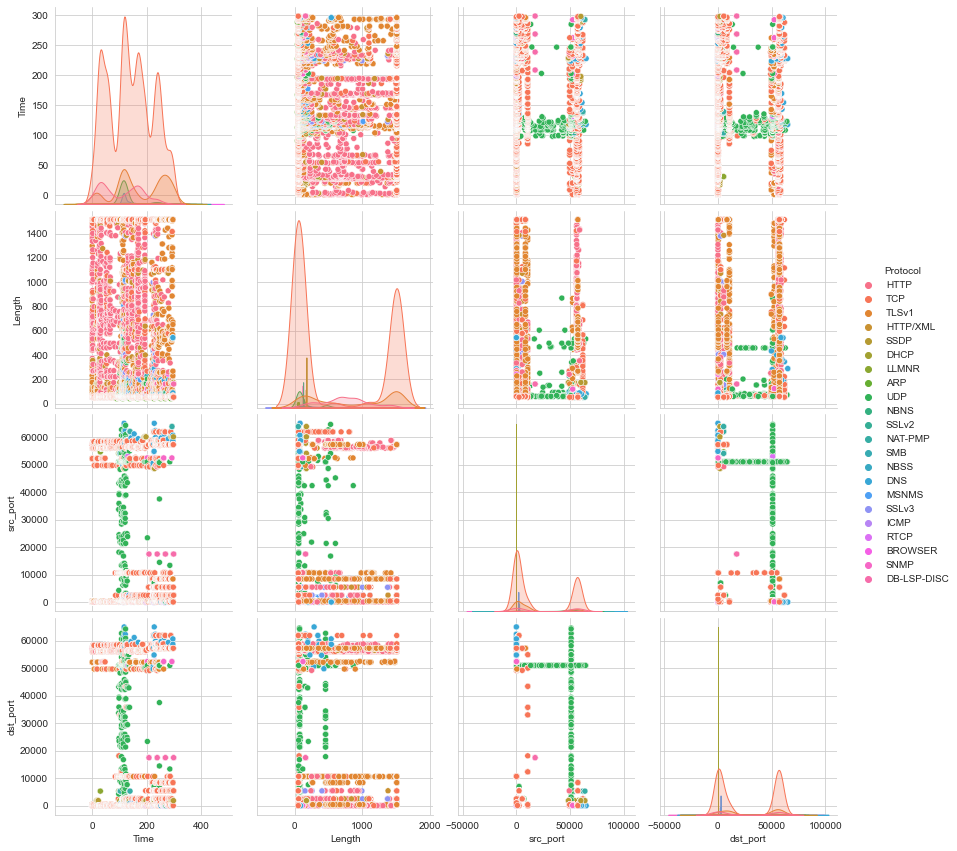

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.close();
sns.set_style('whitegrid');
sns.pairplot(data_frame, hue='Protocol', height=3);
plt.show()

D:\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


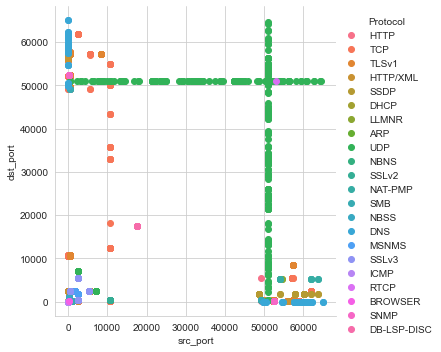

In [20]:
sns.set_style('whitegrid');
sns.FacetGrid(data_frame, hue='Protocol', size=5) \
.map(plt.scatter, 'src_port', 'dst_port') \
.add_legend();
plt.show()